In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\agupt69\\Downloads\\NSDUH_2020_Tab.csv')

C:\Users\agupt69\AppData\Local\Temp\ipykernel_24640\2526213911.py:1: DtypeWarning: Columns (2726) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\agupt69\\Downloads\\NSDUH_2020_Tab.csv')


In [4]:
print(len(df.columns))

2890


In [5]:
drug_related = ['FTNDDNSP', 'ABODALC', 'ABODMRJ', 'ABODCOC', 'ABODHER', 'UDPYHAL', 'UDPYINH', 'UDPYMTH', 'UDPYPNR', 'UDPYTRQ',
                  'UDPYSTM', 'UDPYSED', 'CASUPROB2']
demographics = ['AGE2','IRWRKSTAT','IRSEX', 'IRFAMIN3', 'COUTYP4', 'EDUHIGHCAT']
mental_health = ['DSTHOP30', 'DSTRST30', 'DSTCHR30', 'DSTEFF30', 'DSTNGD30', 'AMDEYR', 'CAMHPROB']

In [6]:
selected_df = df[drug_related+mental_health+demographics]

In [7]:
selected_df.shape

(32893, 26)

In [8]:
mental_health_cleanup1 = ['DSTHOP30', 'DSTRST30', 'DSTCHR30', 'DSTEFF30', 'DSTNGD30']
mental_health_cleanup2 = ['AMDEYR', 'CAMHPROB']

for col in mental_health_cleanup1:
    selected_df[col] = np.where((selected_df[col] == 1) | (selected_df[col] == 2), 1, selected_df[col])
    selected_df[col] = np.where((selected_df[col] >= 3) & (selected_df[col] <= 5), 0, selected_df[col])
    selected_df = selected_df[selected_df[col] < 2]

for col in mental_health_cleanup2:
    df[col] = np.where(df[col] == 2, 0, df[col])

C:\Users\agupt69\AppData\Local\Temp\ipykernel_24640\3722446094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df[col] = np.where((selected_df[col] == 1) | (selected_df[col] == 2), 1, selected_df[col])
C:\Users\agupt69\AppData\Local\Temp\ipykernel_24640\3722446094.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df[col] = np.where((selected_df[col] >= 3) & (selected_df[col] <= 5), 0, selected_df[col])


In [9]:
selected_df['IRFAMIN3'].value_counts()

7    11454
6     4089
5     2287
4     2227
2     2203
3     2028
1     1870
Name: IRFAMIN3, dtype: int64

In [10]:
# Income Level
selected_df['IRFAMIN3'] = np.where((selected_df['IRFAMIN3'] <=3), 0, selected_df['IRFAMIN3'])
selected_df['IRFAMIN3'] = np.where((selected_df['IRFAMIN3'] >=4), 1, selected_df['IRFAMIN3'])
# Employment status
selected_df['IRWRKSTAT'] = np.where((selected_df['IRWRKSTAT'] <=2), 1, selected_df['IRWRKSTAT'])
selected_df['IRWRKSTAT'] = np.where((selected_df['IRWRKSTAT'] >=3), 0, selected_df['IRWRKSTAT'])
# Urban/Rural
selected_df['COUTYP4'] = np.where((selected_df['COUTYP4'] <=2), 1, selected_df['COUTYP4'])
selected_df['COUTYP4'] = np.where((selected_df['COUTYP4'] ==3), 0, selected_df['COUTYP4'])
# Drug of Alcohol use problem
selected_df = selected_df[selected_df['CASUPROB2'].notna()]
# Past year major depressive episode
selected_df = selected_df[selected_df['AMDEYR'].notna()]
# Problem with own mental health
selected_df = selected_df[selected_df['CAMHPROB'] <= 2]
# Sex
selected_df['IRSEX'] = np.where(selected_df['IRSEX'] == 2, 0, 1)
# Age
selected_df['AGE2'] = np.where(selected_df['AGE2'] >= 16, 0, 1)
# Education Status removing individuals < 17 years
selected_df = selected_df[selected_df['EDUHIGHCAT'] < 5]
# Education Status Binary
selected_df['EDUHIGHCAT'] = np.where(selected_df['EDUHIGHCAT'] == 1, 0, 1)

C:\Users\agupt69\AppData\Local\Temp\ipykernel_24640\735148066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['IRFAMIN3'] = np.where((selected_df['IRFAMIN3'] <=3), 0, selected_df['IRFAMIN3'])
C:\Users\agupt69\AppData\Local\Temp\ipykernel_24640\735148066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['IRFAMIN3'] = np.where((selected_df['IRFAMIN3'] >=4), 1, selected_df['IRFAMIN3'])
C:\Users\agupt69\AppData\Local\Temp\ipykernel_24640\735148066.py:5: SettingWithCopyWarning: 
A v

In [11]:
selected_df['IRFAMIN3'].value_counts()

1    19713
0     5979
Name: IRFAMIN3, dtype: int64

In [12]:
selected_df.shape
['DSTHOP30', 'DSTRST30', 'DSTCHR30', 'DSTEFF30', 'DSTNGD30', 'AMDEYR', 'CAMHPROB']

['DSTHOP30',
 'DSTRST30',
 'DSTCHR30',
 'DSTEFF30',
 'DSTNGD30',
 'AMDEYR',
 'CAMHPROB']

In [13]:
selected_df['drugUse'] = np.where((selected_df['FTNDDNSP'] == 1) | (selected_df['ABODALC'] == 1) |
                                  (selected_df['ABODMRJ'] == 1) | (selected_df['ABODCOC'] == 1) |
                                  (selected_df['ABODHER'] == 1) | (selected_df['ABODHER'] == 1) |
                                  (selected_df['UDPYINH'] == 1) | (selected_df['UDPYMTH'] == 1) |
                                  (selected_df['UDPYPNR'] == 1) | (selected_df['UDPYTRQ'] == 1) |
                                  (selected_df['UDPYSTM'] == 1) | (selected_df['UDPYSED'] == 1) |
                                  (selected_df['CASUPROB2'] == 1), 1, 0)

In [14]:
selected_df['drugUse'].value_counts()

0    20317
1     5375
Name: drugUse, dtype: int64

In [15]:
selected_df['MentalHealth'] = np.where((selected_df['DSTHOP30'] == 1) | (selected_df['DSTRST30'] == 1) |
                                  (selected_df['DSTCHR30'] == 1) | (selected_df['DSTEFF30'] == 1) |
                                  (selected_df['DSTNGD30'] == 1) | (selected_df['AMDEYR'] == 1) |
                                  (selected_df['CAMHPROB'] == 1) , 1, 0)

In [16]:
selected_df['IRSEX'].value_counts()

0    14148
1    11544
Name: IRSEX, dtype: int64

In [17]:
\textbf{ = selected_df[['drugUse', 'MentalHealth', 'AGE2','IRWRKSTAT','IRSEX', 'IRFAMIN3', 'COUTYP4', 'EDUHIGHCAT']]

In [18]:
columnNames = {'drugUse': 'DrugUse', 'MentalHealth': 'MentalHealth', 'AGE2': 'Age', 'IRWRKSTAT': 'EmploymentStatus',
              'IRSEX': 'Sex', 'IRFAMIN3': 'IncomeLevel', 'COUTYP4': 'UrbanRural', 'EDUHIGHCAT':'EducationLevel'}

In [19]:
Model_df.rename(columns=columnNames, inplace=True)

C:\Users\agupt69\AppData\Local\Temp\ipykernel_24640\3583517493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Model_df.rename(columns=columnNames, inplace=True)


In [56]:
Model_df.to_csv("FinalDataSets/Final_Model_Data.csv", sep=",", index = False)
selected_df.to_csv("FinalDataSets/Final_All_NSDUH_Clean_Data.csv", sep=",", index = False)

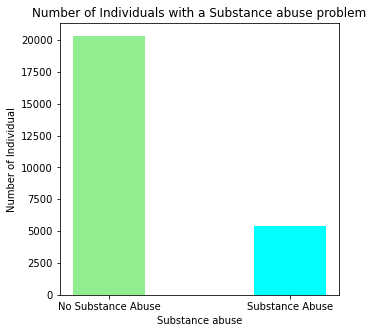

In [35]:
fig = plt.figure(figsize = (5, 5))
c = ['lightgreen', 'cyan']
plt.bar(['No Substance Abuse','Substance Abuse'], Model_df['DrugUse'].value_counts(), color=c, width=0.4)
plt.xlabel("Substance abuse")
plt.ylabel("Number of Individual")
plt.title("Number of Individuals with a Substance abuse problem")
plt.show()

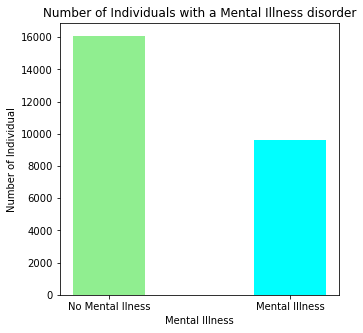

In [36]:
fig = plt.figure(figsize = (5, 5))
c = ['lightgreen', 'cyan']
plt.bar(['No Mental Ilness','Mental Illness'], Model_df['MentalHealth'].value_counts(), color=c, width=0.4)
plt.xlabel("Mental Illness")
plt.ylabel("Number of Individual")
plt.title("Number of Individuals with a Mental Illness disorder")
plt.show()

In [46]:
Model_df['Co_occuring'] =  np.where((selected_df['drugUse'] == 1) & (selected_df['MentalHealth'] == 1), 1, 0)
Model_df['Co_occuring'].value_counts()

C:\Users\agupt69\AppData\Local\Temp\ipykernel_24640\930984880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Model_df['Co_occuring'] =  np.where((selected_df['drugUse'] == 1) & (selected_df['MentalHealth'] == 1), 1, 0)


0    22475
1     3217
Name: Co_occuring, dtype: int64

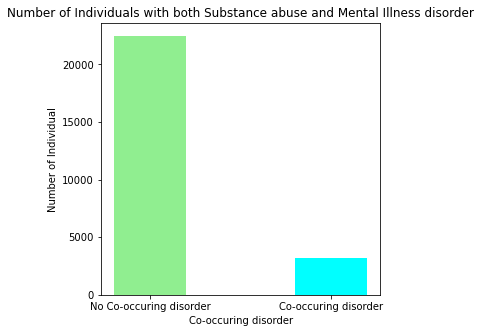

In [47]:
fig = plt.figure(figsize = (5, 5))
c = ['lightgreen', 'cyan']
plt.bar(['No Co-occuring disorder','Co-occuring disorder'], Model_df['Co_occuring'].value_counts(), color=c, width=0.4)
plt.xlabel("Co-occuring disorder")
plt.ylabel("Number of Individual")
plt.title("Number of Individuals with both Substance abuse and Mental Illness disorder")
plt.show()